In [1]:
import pandas as pd
import numpy as np

from scipy.signal import lfilter

import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import PowerTransformer
from sklearn.linear_model import Ridge
from sklearn.decomposition import PCA
from sklearn.svm import SVR
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_squared_error as mse


from scipy.optimize import minimize


from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor

import pymc3 as pm
import seaborn as sns
from matplotlib import animation


pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

import arviz as az
az.rcParams['plot.max_subplots'] = 60

from prophet import Prophet

/usr/local/anaconda3/envs/pymc3/lib/python3.8/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Importing plotly failed. Interactive plots will not work.


In [2]:
import theano.tensor as tt

In [3]:
columns_to_read_perf = [#'year',
                   'week',
                   #'num_week_year',
#                    'sin_week_year',
#                    'cos_week_year',
#                    'sin4p_week_year',
#                    'cos4p_week_year',
                   #'jan',
                   #'feb',
                   #'march',
                   #'apr',
                   #'may',
                   #'june',
                   #'july',
                   #'aug',
                   #'sept',
                   #'oct',
                   #'nov',
                   #'dec',
                   #'TOM_intrpln',
                   'sens_traf',
                   'paid_traf',
                   'cbr',
                   'mrtg_rate_all',
                   #'mrtg_rate_new',
                   #'mrtg_rate_vtorichka',
#                    'ws_циан_узкое',
#                    'ws_cian_узкое',
#                   'ws_buy_flat_узкое',
#                  'ws_rent_flat_узкое',
                   'OLV',
                   'Media',
                   'OOH',
#                   'TRP_all_cian',
                   'paid_traf',
                    'TRP_nac_cian',
#                    'TRP_reg_cian',
#                   'TRP_all_domclick',
#                    'TRP_nac_domclick',
#                    'TRP_reg_domclick',
#                    'TRP_all_yandex',
#                    'TRP_nac_yandex',
#                    'TRP_reg_yandex',
#                    'TRP_all_avito',
#                    'TRP_nac_avito',
#                    'TRP_reg_avito',
#                    'TRP_avito_all_vertical_all',
#                    'TRP_avito_all_vertical_nac',
#                    'TRP_avito_all_vertical_reg',
#                    'TRP_ALL_all',
                    'TRP_ALL_nac',
#                    'TRP_all_reg'
                  ]

In [4]:
raw_data_perf = pd.read_excel('mmm_week_final_my_copy.xlsx', usecols=columns_to_read_perf, parse_dates=['week'])
#ddata = pd.DataFrame(data['week'], dtype = str)
raw_data_perf['TRP_enemy_nac'] = raw_data_perf['TRP_ALL_nac'] - raw_data_perf['TRP_nac_cian']
raw_data_perf = raw_data_perf.drop(columns=['TRP_ALL_nac'])
raw_data_perf.head()

,week,sens_traf,paid_traf,cbr,mrtg_rate_all,OLV,Media,OOH,TRP_nac_cian,TRP_enemy_nac
0,2018-12-31,2233939,693371,7.75,9.66,0,0,0,347.0428,634.9572
1,2019-01-07,3477567,965736,7.75,9.66,0,0,0,507.1800,564.8200
2,2019-01-14,3731286,982702,7.75,9.66,0,0,0,484.7501,2034.2499
3,2019-01-21,3712884,962363,7.75,9.66,0,0,0,542.7604,1641.2396
4,2019-01-28,3606410,982433,7.75,9.66,0,0,0,519.3274,1896.6726


In [5]:
columns_to_read_money = [
    'paid_S',
    'OLV_S',
    'Media_S',
    'OOH_S',
    'TV_S',
]

In [6]:
raw_data_money = pd.read_excel('mmm_pyMC_kate.xlsx', usecols=columns_to_read_money)

raw_data_money.head()

,paid_S,OLV_S,Media_S,OOH_S,TV_S
0,7336490.0,0.0,0.0,0.0,22120730.0
1,9344721.0,0.0,0.0,0.0,22120730.0
2,9611630.0,0.0,0.0,0.0,22120730.0
3,10135731.0,0.0,0.0,0.0,22120730.0
4,11307052.0,0.0,0.0,0.0,22120730.0


#Prophet

In [7]:
prophet = Prophet(yearly_seasonality=True)
#prophet.add_country_holidays(country_name='RU')

In [8]:
prophet_data = raw_data_perf.rename(columns = {'sens_traf': 'y', 'week': 'ds'})

In [9]:
#prophet.add_regressor(name = "mrtg_rate_all")

In [10]:
prophet.fit(prophet_data[['ds', 'y',]]) #'mrtg_rate_all']])

16:14:17 - cmdstanpy - INFO - Chain [1] start processing
16:14:17 - cmdstanpy - INFO - Chain [1] done processing


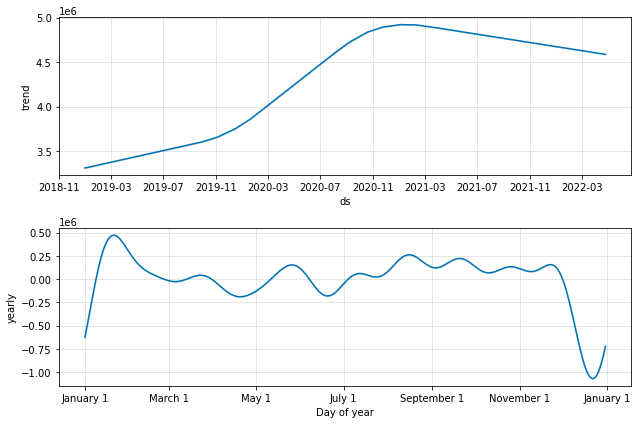

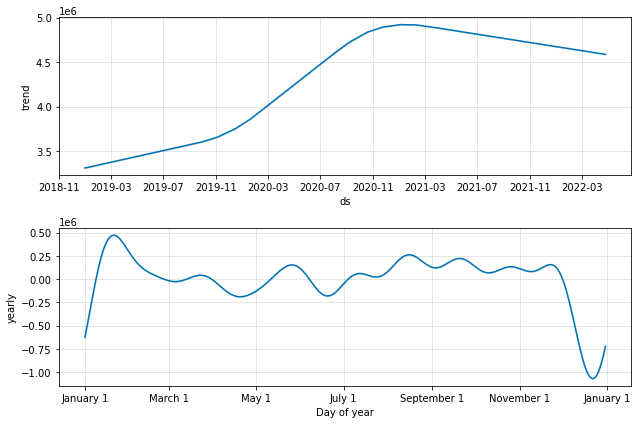

In [11]:
prophet_predict = prophet.predict(prophet_data[['ds', 'y']]) #'mrtg_rate_all']])
prophet.plot_components(prophet_predict)

In [12]:
data = pd.concat([raw_data_perf, raw_data_money], axis=1)
data["trend"] = prophet_predict["trend"]
data["season"] = prophet_predict["yearly"]
#data['mrtg'] = prophet_predict['mrtg_rate_all']

data.head()

,week,sens_traf,paid_traf,cbr,mrtg_rate_all,OLV,Media,OOH,TRP_nac_cian,TRP_enemy_nac,paid_S,OLV_S,Media_S,OOH_S,TV_S,trend,season
0,2018-12-31,2233939,693371,7.75,9.66,0,0,0,347.0428,634.9572,7336490.0,0.0,0.0,0.0,22120730.0,3.310387e+06,-739601.493746
1,2019-01-07,3477567,965736,7.75,9.66,0,0,0,507.1800,564.8200,9344721.0,0.0,0.0,0.0,22120730.0,3.317920e+06,-177990.762938
2,2019-01-14,3731286,982702,7.75,9.66,0,0,0,484.7501,2034.2499,9611630.0,0.0,0.0,0.0,22120730.0,3.325452e+06,294149.650084
3,2019-01-21,3712884,962363,7.75,9.66,0,0,0,542.7604,1641.2396,10135731.0,0.0,0.0,0.0,22120730.0,3.332985e+06,471407.456846
4,2019-01-28,3606410,982433,7.75,9.66,0,0,0,519.3274,1896.6726,11307052.0,0.0,0.0,0.0,22120730.0,3.340517e+06,393113.862794


In [13]:
X = data[['paid_S', 'OLV_S', 'Media_S', 'OOH_S', 'TV_S', 'TRP_enemy_nac', 'trend', 'season', 'cbr', 'mrtg_rate_all']]
y = data['sens_traf']

In [14]:
media_spend_columns = ['paid_S', 'OLV_S', 'Media_S', 'OOH_S', 'TV_S']
enemy_columns = ['TRP_enemy_nac']
control_columns = ['mrtg_rate_all', 'cbr', 'season', 'trend']
negative_columns = ['TRP_enemy_nac', 'cbr', 'mrtg_rate_all']

In [83]:
X_transformed = X.copy()
X_encoder_dict = {}
for feature in media_spend_columns + control_columns + enemy_columns:
    scaler = MinMaxScaler()
    original = X[feature].values.reshape(-1, 1)
    transformed = scaler.fit_transform(original)
    if feature in negative_columns:
        X_transformed[feature] = 1-transformed
    else:
        X_transformed[feature] = transformed
        X_encoder_dict[feature] = scaler
    
y_transformed = y.copy()
y_transformed /= 100000

In [84]:
X_transformed.head()

,paid_S,OLV_S,Media_S,OOH_S,TV_S,TRP_enemy_nac,trend,season,cbr,mrtg_rate_all
0,0.321052,0.0,0.0,0.0,0.600186,0.800401,0.000000,0.214935,0.777778,0.25788
1,0.409341,0.0,0.0,0.0,0.600186,0.822451,0.004677,0.579012,0.777778,0.25788
2,0.421075,0.0,0.0,0.0,0.600186,0.360503,0.009354,0.885088,0.777778,0.25788
3,0.444116,0.0,0.0,0.0,0.600186,0.484054,0.014031,1.000000,0.777778,0.25788
4,0.495612,0.0,0.0,0.0,0.600186,0.403753,0.018708,0.949244,0.777778,0.25788


In [85]:
y_transformed.head()

0    22.33939
1    34.77567
2    37.31286
3    37.12884
4    36.06410
Name: sens_traf, dtype: float64

In [86]:
def saturate(x, a):
    return 1 - tt.exp(-a*x)

def carryover(x, strength, delay, length=12):
    w = tt.as_tensor_variable(
        [tt.power(strength, (i-delay) ** 2) for i in range(length)]
    )
    
    x_lags = tt.stack(
        [tt.concatenate([
            tt.zeros(i),
            x[:x.shape[0]-i]
        ]) for i in range(length)]
    )
    
    return tt.dot(w, x_lags) / tt.sum(w)

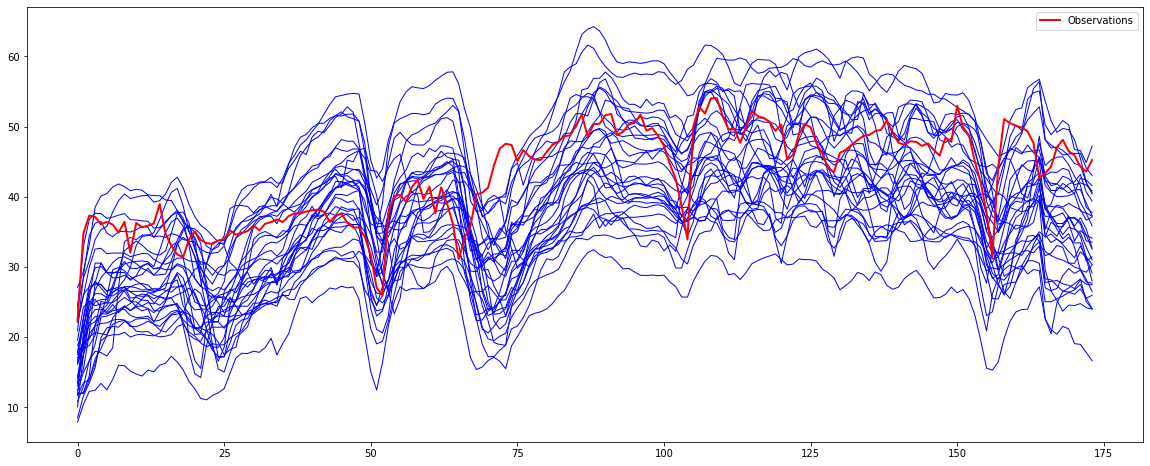

In [164]:
with pm.Model() as mmm:
    channel_contributions = []
    
    for channel in media_spend_columns:
        coef = pm.Gamma(f'coef_{channel}', alpha=5, beta=1)
        sat = pm.Gamma(f'sat_{channel}', alpha=3, beta=0.5)
        car = pm.Beta(f'car_{channel}', alpha=5, beta=5)
        delay = pm.HalfNormal(f'delay_{channel}', sd=4)
        
        channel_data = X_transformed[channel].values
        channel_contribution = pm.Deterministic(
            f'contribution_{channel}',
            coef * saturate(
                carryover(
                    channel_data,
                    car,
                    delay
                ),
                sat
            )
        ) 
        channel_contributions.append(channel_contribution)
        
        
    for channel in enemy_columns:
        coef = pm.Gamma(f'coef_{channel}', alpha=5, beta=1)
        sat = pm.Gamma(f'sat_{channel}', alpha=3, beta=0.5)
        car = pm.Beta(f'car_{channel}', alpha=5, beta=5)
        delay = pm.HalfNormal(f'delay_{channel}', sd=4)
        
        channel_data = X_transformed[channel].values
        channel_contribution = pm.Deterministic(
            f'contribution_{channel}',
           coef * saturate(
                carryover(
                    channel_data,
                    car,
                    delay
                ),
                sat
            )
        ) 
        channel_contributions.append(channel_contribution)
        
        
        
    for channel in ['cbr', 'mrtg_rate_all']:
        coef = pm.Gamma(f'coef_{channel}', alpha=8, beta=1)
        #sat = pm.Gamma(f'sat_{channel}', alpha=4, beta=0.5)
        channel_data = X_transformed[channel].values
        channel_contribution = pm.Deterministic(
            f'contribution_{channel}', coef * channel_data)#saturate(channel_data, sat))
        
        channel_contributions.append(channel_contribution)
        
        
    for channel in ['season', 'trend']:
        coef = pm.Gamma(f'coef_{channel}', alpha=3, beta=1)
        channel_data = X_transformed[channel].values
        channel_contribution = pm.Deterministic(f'contribution_{channel}', coef * channel_data)
        
        channel_contributions.append(channel_contribution)
        
        
    base = pm.Gamma(f'base', alpha=1, beta=0.25)
    noise = pm.HalfNormal('noise', sd=0.2)
    
    sales = pm.Normal(
        'sales',
        mu=sum(channel_contributions) + base,
        sigma=noise,
        observed=y_transformed
    )
    
    #step = pm.NUTS()
    
    
with mmm:
    plt.figure(figsize=(20, 8))
    ppc = pm.sample_prior_predictive(30)
    for s in ppc['sales']:
        #y_pred, noise_pred = draw_pred(ppc, i)
        plt.plot(s, linewidth=1, c='b')
    plt.plot(y_transformed, linewidth=2, c='r', label='Observations')
    #plt.fill_between(np.arange(len(y)), y_pred - noise, y_pred + noise, alpha=0.33)
    plt.legend()

In [165]:


def draw_pred(trace_p, num):
    channel_contributions = []
    
    for channel in media_spend_columns:
        coef = trace_p[f'coef_{channel}'].values.reshape(4000, 1).mean()
        sat = trace_p[f'sat_{channel}'].values.reshape(4000, 1).mean()
        car = trace_p[f'car_{channel}'].values.reshape(4000, 1).mean()
        delay = trace_p[f'delay_{channel}'].values.reshape(4000, 1).mean()
        
        channel_data = X_transformed[channel].values
        channel_contribution = coef * saturate(
                carryover(
                    channel_data,
                    car,
                    delay
                ),
                sat
            ).eval()
        channel_contributions.append(channel_contribution)
        
        
    for channel in enemy_columns:
        coef = trace_p[f'coef_{channel}'].values.reshape(4000, 1).mean()
        sat = trace_p[f'sat_{channel}'].values.reshape(4000, 1).mean()
        car = trace_p[f'car_{channel}'].values.reshape(4000, 1).mean()
        delay = trace_p[f'delay_{channel}'].values.reshape(4000, 1).mean()
        
        channel_data = X_transformed[channel].values
        channel_contribution =  coef * saturate(
                carryover(
                    channel_data,
                    car,
                    delay
                ),
                sat
            ).eval()
        channel_contributions.append(channel_contribution)
        
        
        
    for channel in ['cbr', 'mrtg_rate_all']:
        coef = trace_p[f'coef_{channel}'].values.reshape(4000, 1).mean()
        #sat = trace_p[f'sat_{channel}'].values.reshape(4000, 1).mean()
        channel_data = X_transformed[channel].values
        channel_contribution = coef * channel_data#saturate(channel_data, sat).eval()
        
        channel_contributions.append(channel_contribution)
        
        
    for channel in ['season', 'trend']:
        coef = trace_p[f'coef_{channel}'].values.reshape(4000, 1).mean()
        channel_data = X_transformed[channel].values
        channel_contribution =coef * channel_data
        
        channel_contributions.append(channel_contribution)
        
        
    base = trace_p['base'].values.reshape(4000, 1).mean()
    noise = trace_p['noise'].values.reshape(4000, 1).mean()
    
    return np.sum(channel_contributions, axis=0) + base, noise

In [166]:
with mmm:
    trace = pm.sample(tune=1500,return_inferencedata=True, target_accept=0.98)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [noise, base, coef_trend, coef_season, coef_mrtg_rate_all, coef_cbr, delay_TRP_enemy_nac, car_TRP_enemy_nac, sat_TRP_enemy_nac, coef_TRP_enemy_nac, delay_TV_S, car_TV_S, sat_TV_S, coef_TV_S, delay_OOH_S, car_OOH_S, sat_OOH_S, coef_OOH_S, delay_Media_S, car_Media_S, sat_Media_S, coef_Media_S, delay_OLV_S, car_OLV_S, sat_OLV_S, coef_OLV_S, delay_paid_S, car_paid_S, sat_paid_S, coef_paid_S]


Sampling 4 chains for 1_500 tune and 1_000 draw iterations (6_000 + 4_000 draws total) took 593 seconds.


In [167]:
# with mmm:
#     pm.traceplot(trace)

<AxesSubplot:xlabel='sales / sales'>

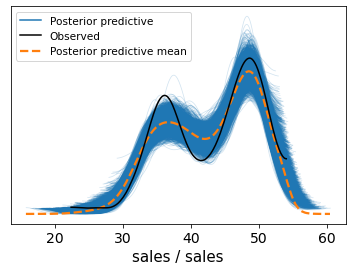

In [168]:
with mmm:
    posterior = pm.sample_posterior_predictive(trace, var_names=["sales"])
az.plot_ppc(az.from_pymc3(posterior_predictive=posterior, model=mmm), var_names = ["sales"])

array([[<AxesSubplot:title={'center':'coef_paid_S'}>,
        <AxesSubplot:title={'center':'sat_paid_S'}>,
        <AxesSubplot:title={'center':'car_paid_S'}>],
       [<AxesSubplot:title={'center':'delay_paid_S'}>,
        <AxesSubplot:title={'center':'coef_OLV_S'}>,
        <AxesSubplot:title={'center':'sat_OLV_S'}>],
       [<AxesSubplot:title={'center':'car_OLV_S'}>,
        <AxesSubplot:title={'center':'delay_OLV_S'}>,
        <AxesSubplot:title={'center':'coef_Media_S'}>],
       [<AxesSubplot:title={'center':'sat_Media_S'}>,
        <AxesSubplot:title={'center':'car_Media_S'}>,
        <AxesSubplot:title={'center':'delay_Media_S'}>],
       [<AxesSubplot:title={'center':'coef_OOH_S'}>,
        <AxesSubplot:title={'center':'sat_OOH_S'}>,
        <AxesSubplot:title={'center':'car_OOH_S'}>],
       [<AxesSubplot:title={'center':'delay_OOH_S'}>,
        <AxesSubplot:title={'center':'coef_TV_S'}>,
        <AxesSubplot:title={'center':'sat_TV_S'}>],
       [<AxesSubplot:title={'center

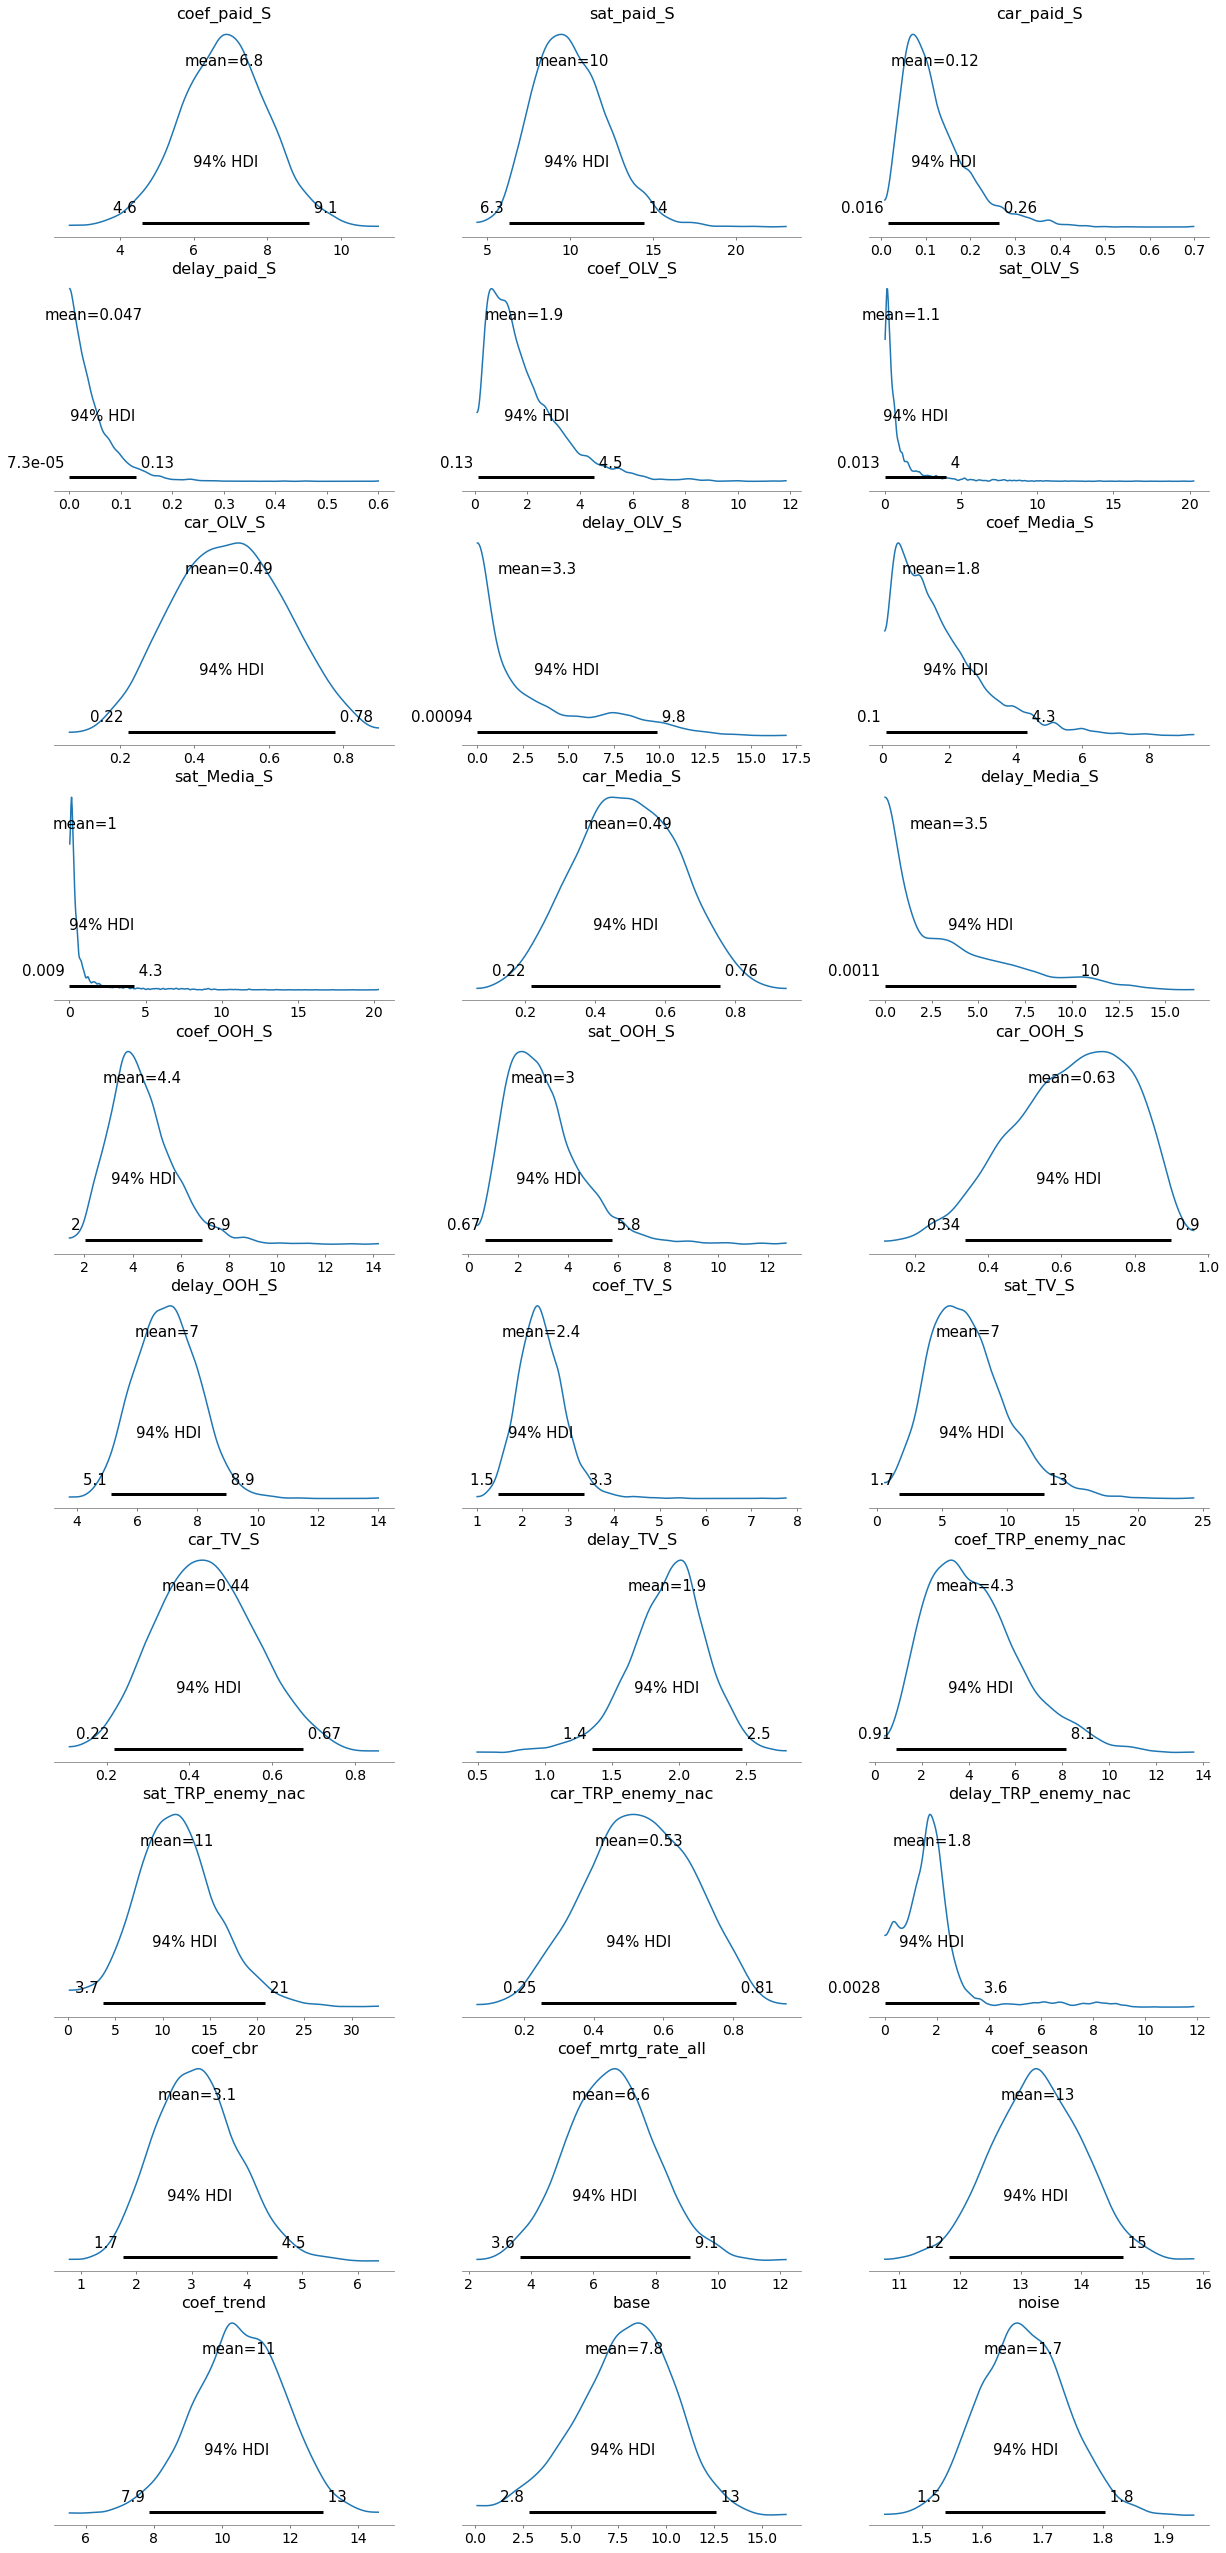

In [169]:
az.plot_posterior(
    trace,
    var_names=['~contribution'],
    filter_vars='like'
)

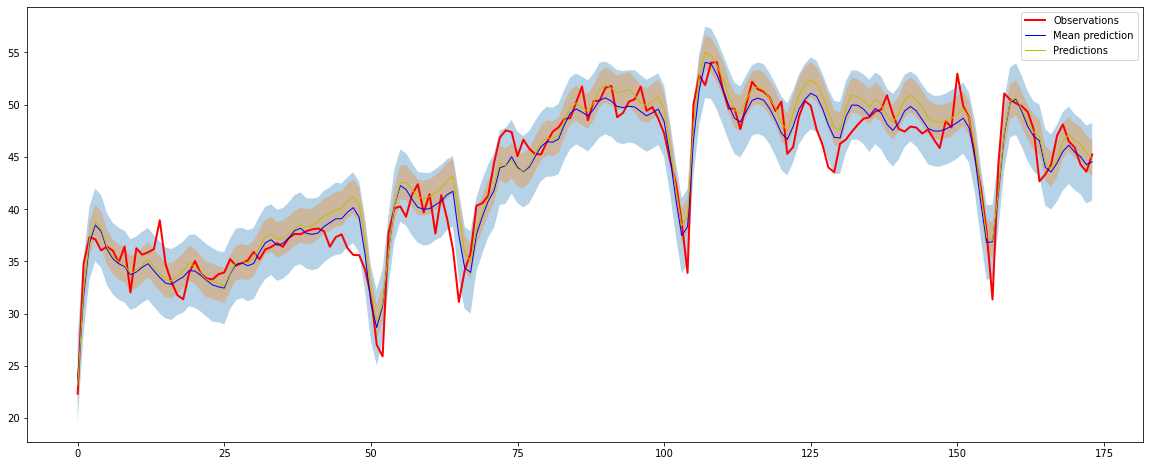

In [170]:
y_pred, y_noise = draw_pred(trace.posterior, 0)
means = posterior['sales'].mean(0)
stds = posterior['sales'].std(0)
plt.figure(figsize=(20, 8))
plt.plot(y_transformed, linewidth=2, c='r', label='Observations')
plt.plot(means, linewidth=1, c='b', label='Mean prediction')
plt.plot(y_pred, linewidth=1, c='y', label='Predictions')
plt.fill_between(np.arange(len(y)), means - 2*stds, means + 2*stds, alpha=0.33)
plt.fill_between(np.arange(len(y)), y_pred - y_noise, y_pred + y_noise, alpha=0.33)
plt.legend()

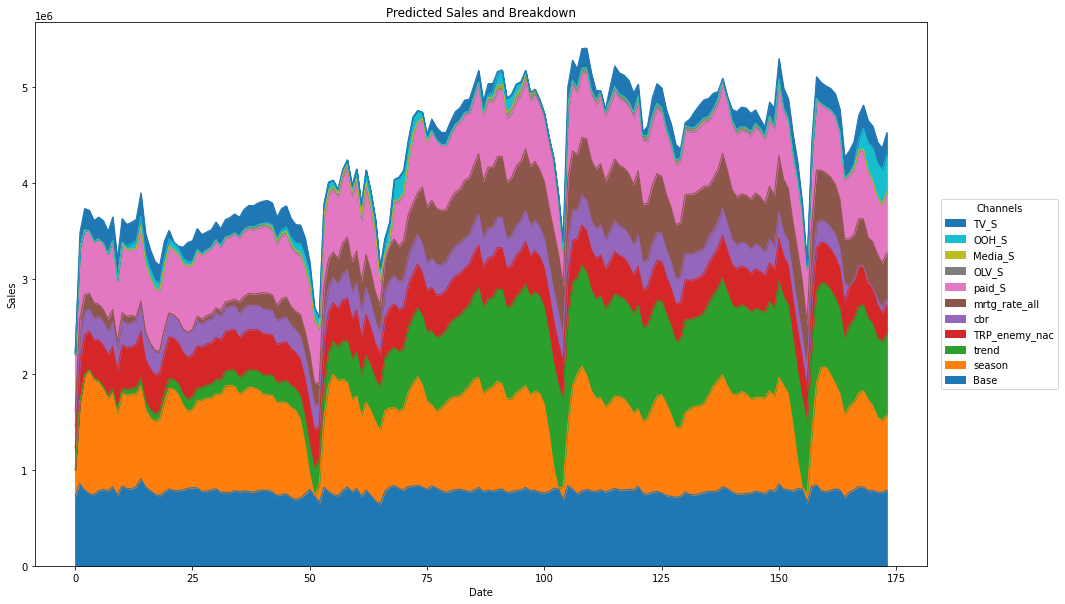

In [179]:



def compute_mean(trace, channel):
    return (trace
            .posterior[f'contribution_{channel}']
            .values
            .reshape(4000, 174)
            .mean(0)
           )
channels = ['season', 'trend'] + negative_columns + media_spend_columns
unadj_contributions = pd.DataFrame(
   {'Base': trace.posterior['base'].values.mean()},
   index=X.index
)



for channel in channels:
#     if channel in negative_columns:
#         coef = -1
#     else:
#         coef = 1
    unadj_contributions[channel] = compute_mean(trace, channel)

    
    
    
adj_contributions = (unadj_contributions
                     .div(unadj_contributions.sum(axis=1), axis=0)
                     .mul(y, axis=0)
                    )
#adj_contributions = adjt_contributions#.div(adjt_contributions.sum(axis=1), axis=0)


ax = (adj_contributions
      .plot.area(
          figsize=(16, 10),
          linewidth=1,
          title='Predicted Sales and Breakdown',
          ylabel='Sales',
          xlabel='Date'
      )
     )

# ax.plot(1-X_transformed['TRP_enemy_nac'], label='Enemy trp % of max')
# ax.plot(X_transformed['TV_S'], label='Cian TV spend % of max')

#ax.plot(y, label='SENSE_TRAF', c='b', linewidth=3, linestyle = '--',)
    
handles, labels = ax.get_legend_handles_labels()

ax.legend(
    handles[::-1], labels[::-1],
    title='Channels', loc="center left",
    bbox_to_anchor=(1.01, 0.5)
)

In [180]:
def easy_saturate(x, a):
    return 1 - np.exp(-a*x)

def plot_hill(alpha, name):
    plt.figure(figsize=(30,10)) # Задаем размер графика
    x = np.linspace(0,1,1000)
    y = easy_saturate(x, alpha)
    plt.plot(x, y, label = f'SAT = {alpha}')
    plt.title(f'Saturation {name}', fontsize=30)
    plt.legend()
    
def plot_channel_saturation(channel):
    with mmm:
        plot_hill(trace.posterior[f'sat_{channel}'].values.reshape(4000, 1).mean(), channel)
    


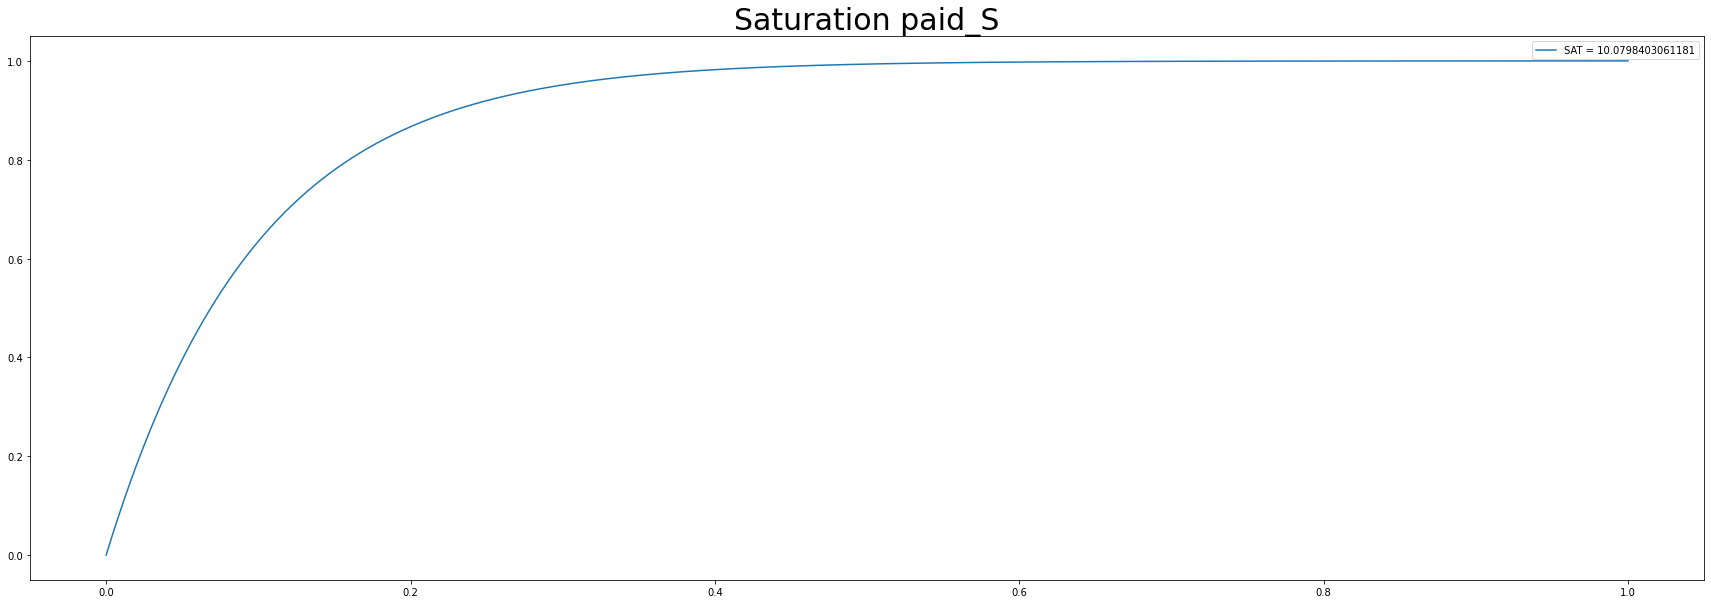

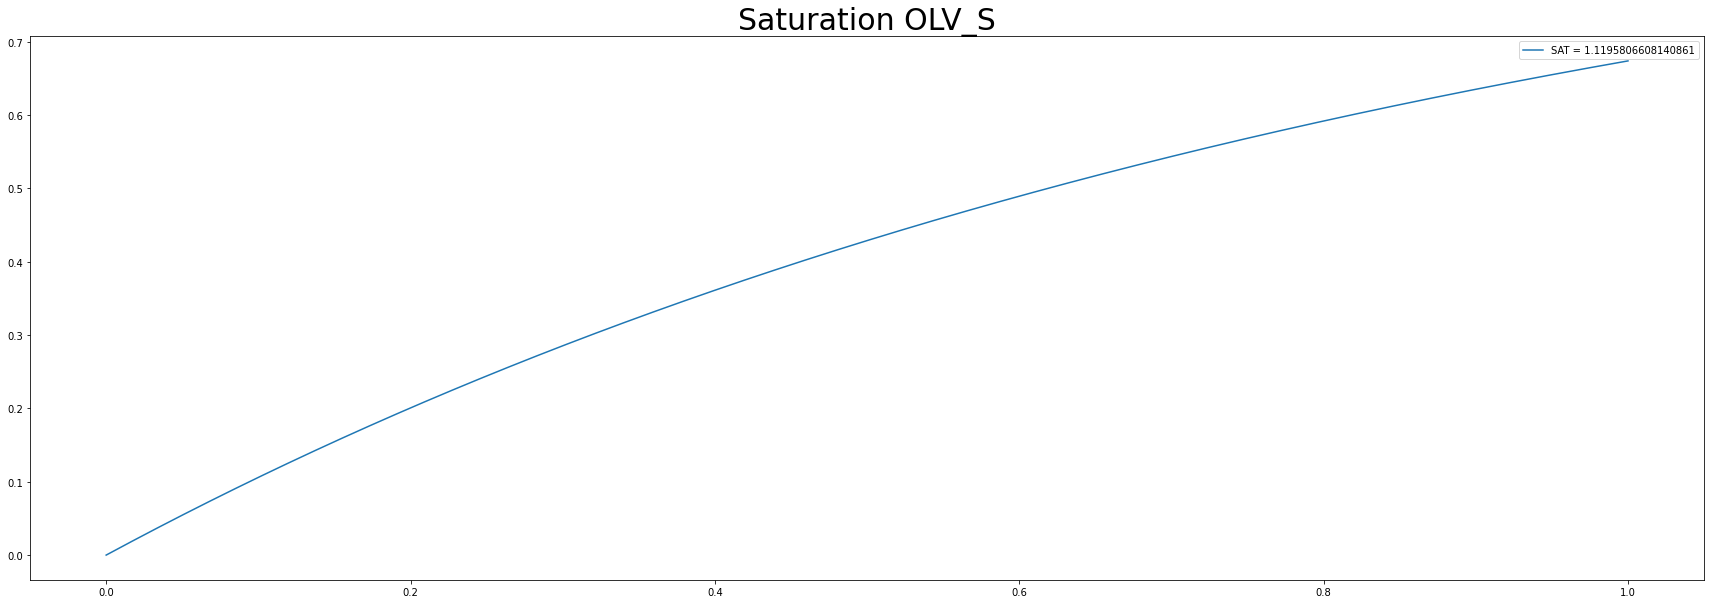

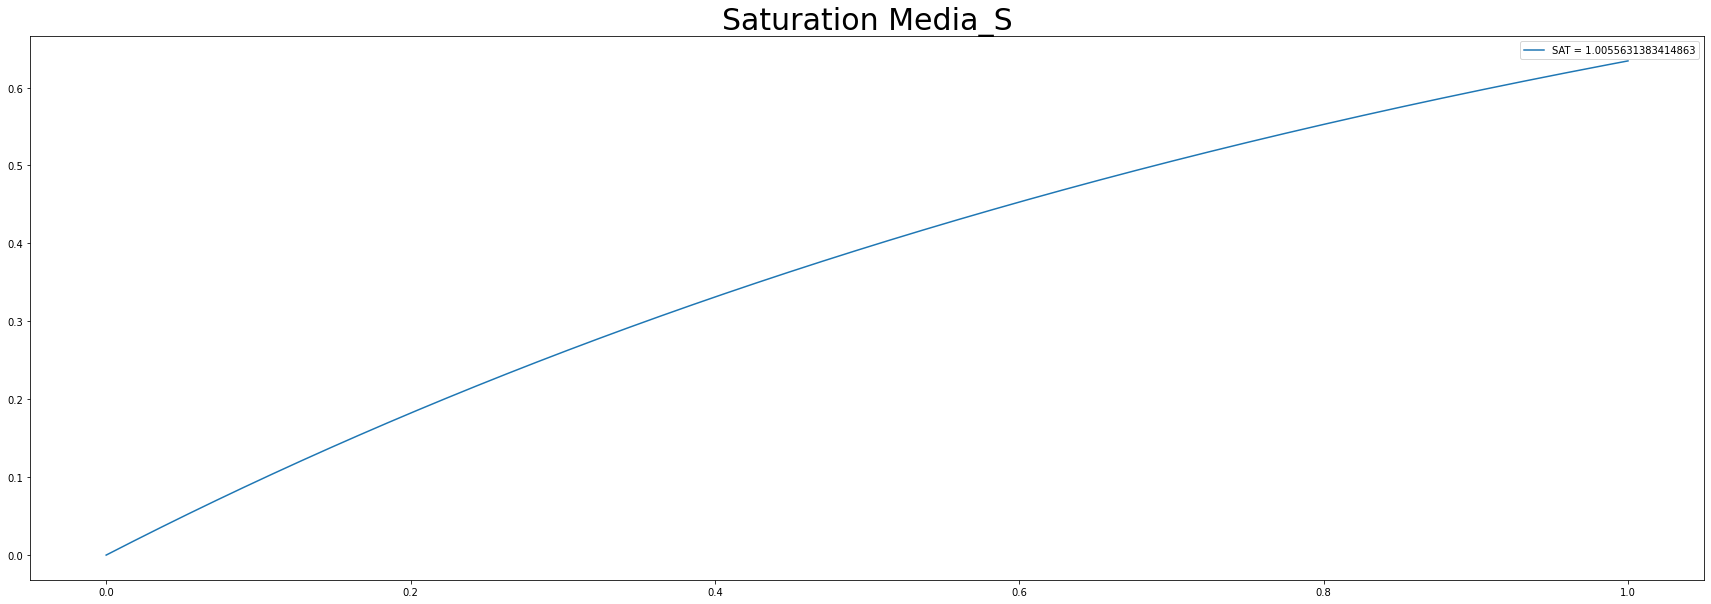

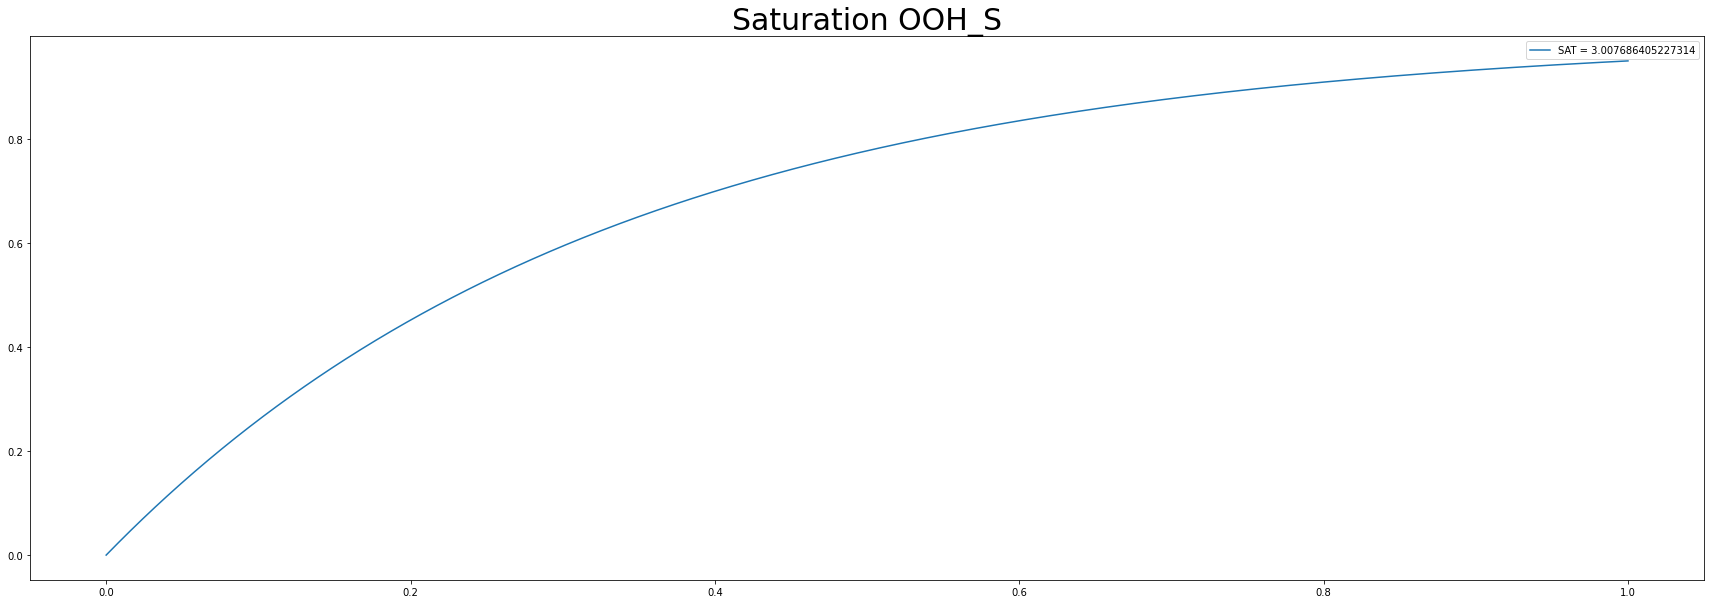

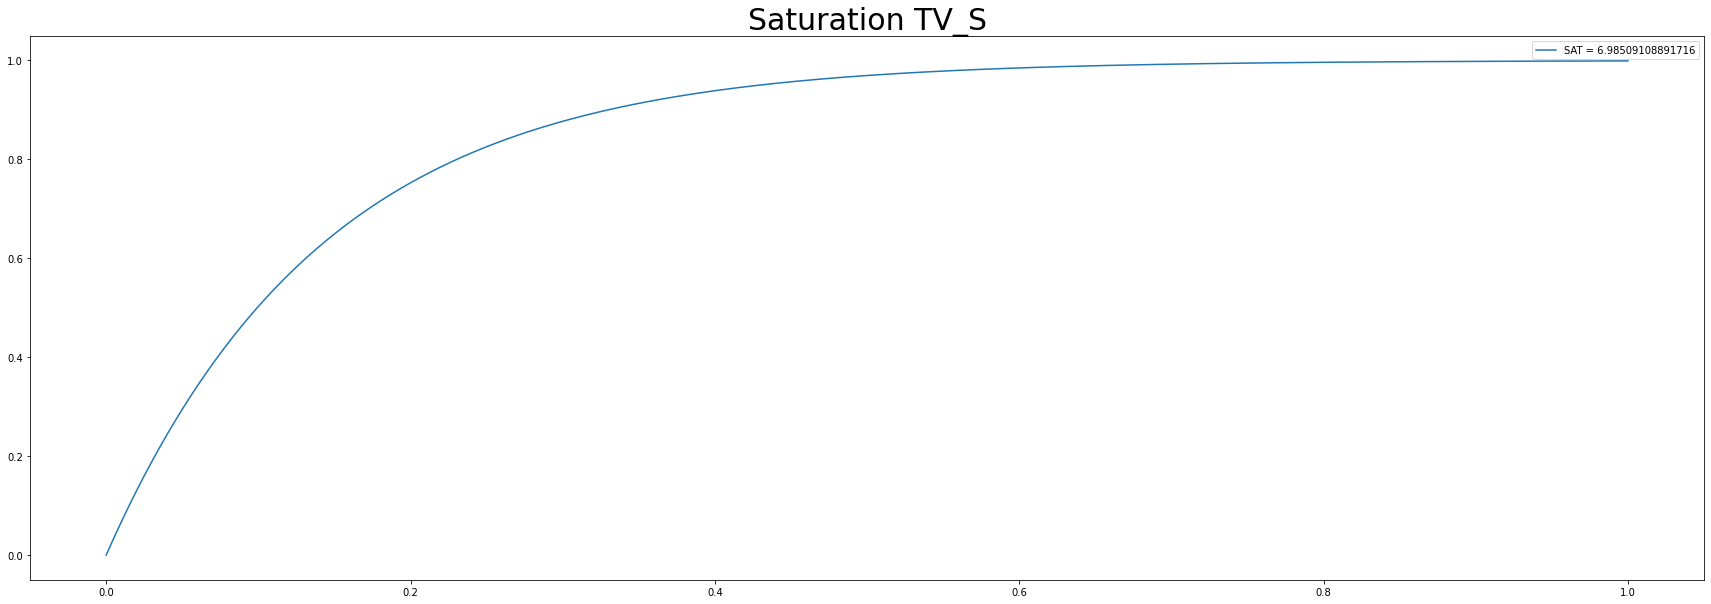

In [181]:
for channel in media_spend_columns:
    plot_channel_saturation(channel)

In [182]:
def plot_channel(channel):
    sat = trace.posterior[f'sat_{channel}'].values.reshape(4000, 1).mean()
    delay = trace.posterior[f'delay_{channel}'].values.reshape(4000, 1).mean()
    car = trace.posterior[f'car_{channel}'].values.reshape(4000, 1).mean()
    plt.figure(figsize=(30,10))
    plt.plot(data['week'], X_transformed[channel], label='Траты на канал')
    plt.plot(data['week'], saturate(carryover(tt.as_tensor_variable(X_transformed[channel]), car, delay), sat).eval(), label='Эффект канала')
    plt.legend()
    plt.title(f'Эдсток и насыщение {channel} (лаг ~ {round(delay)}н)', fontsize=30)
    plt.show()

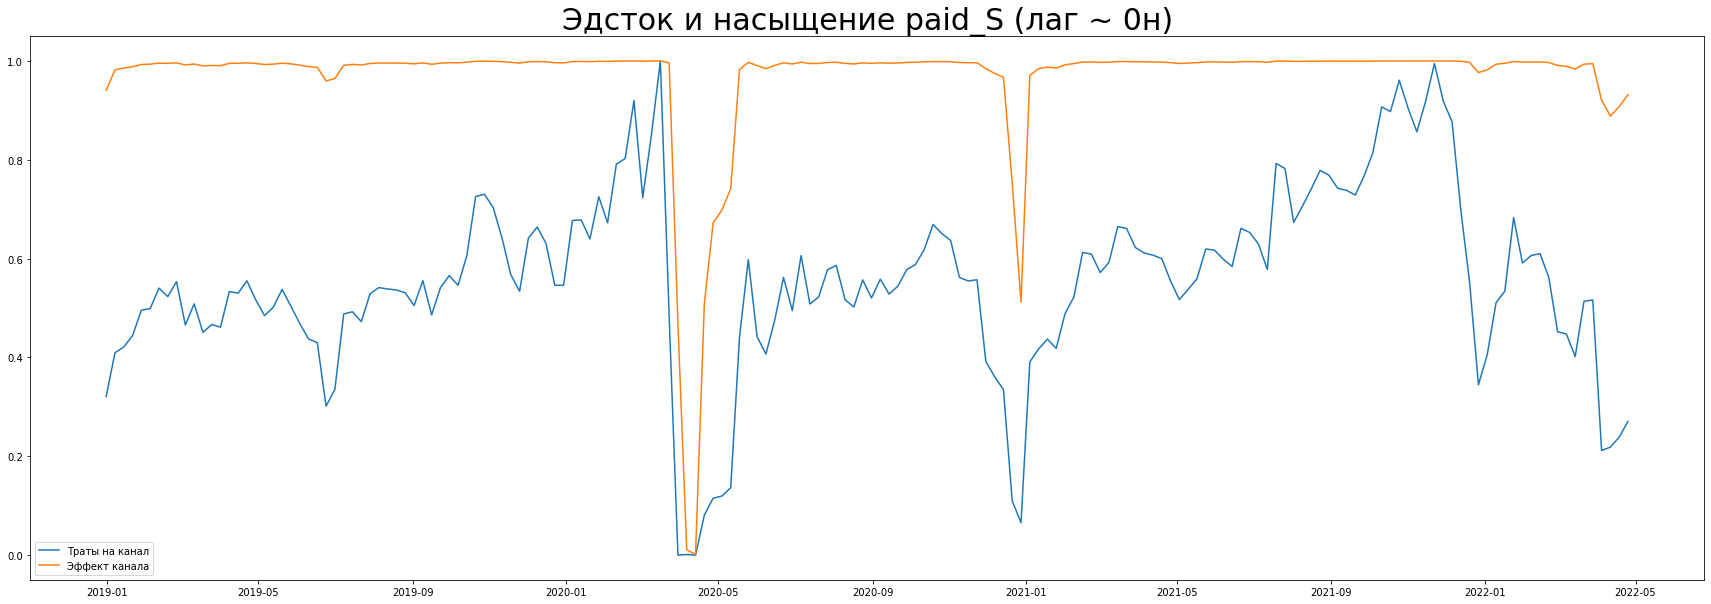

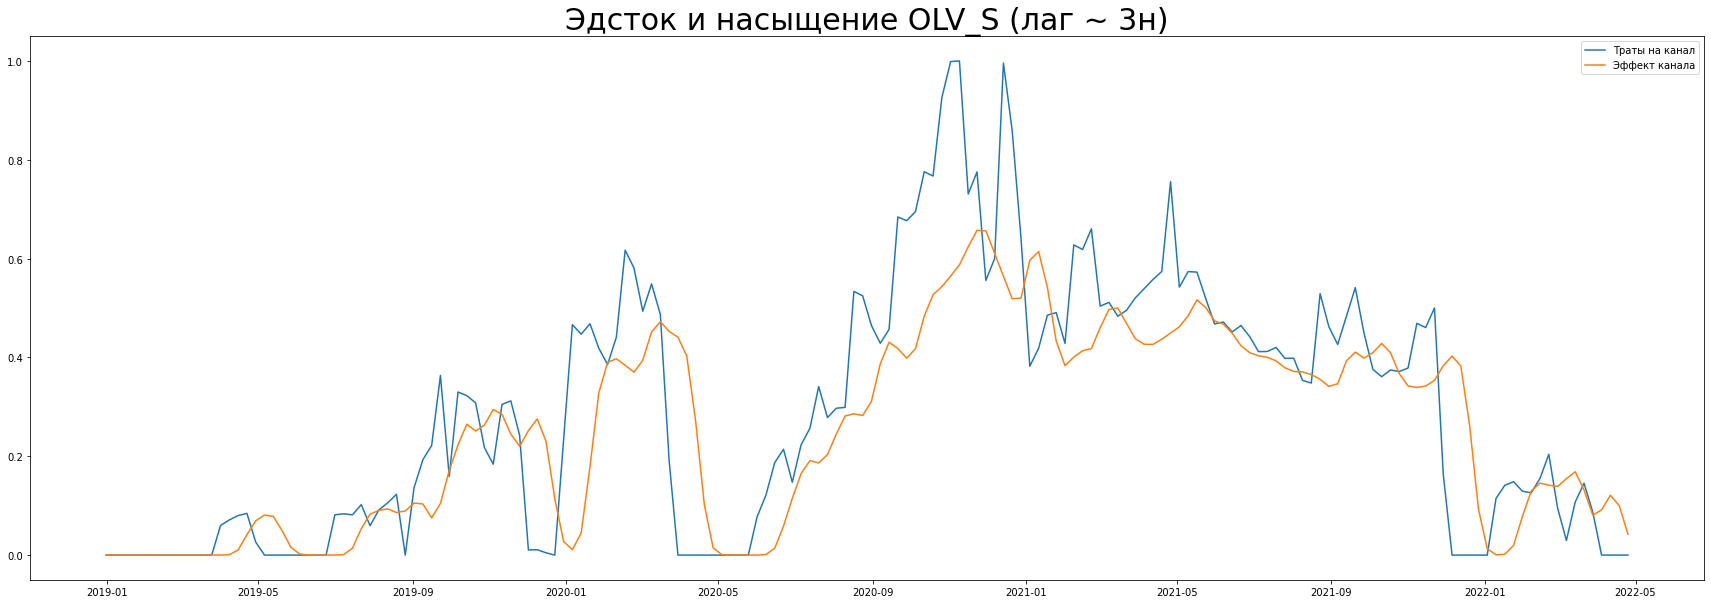

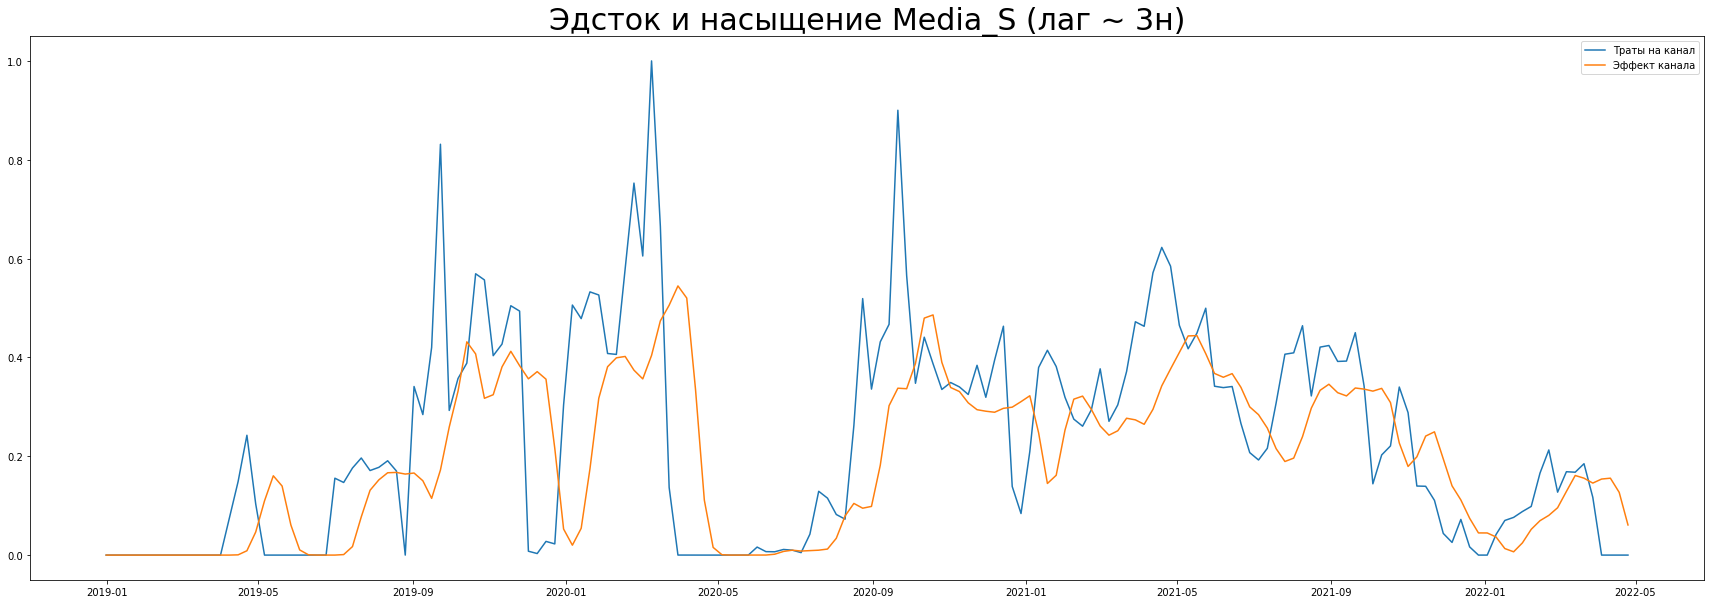

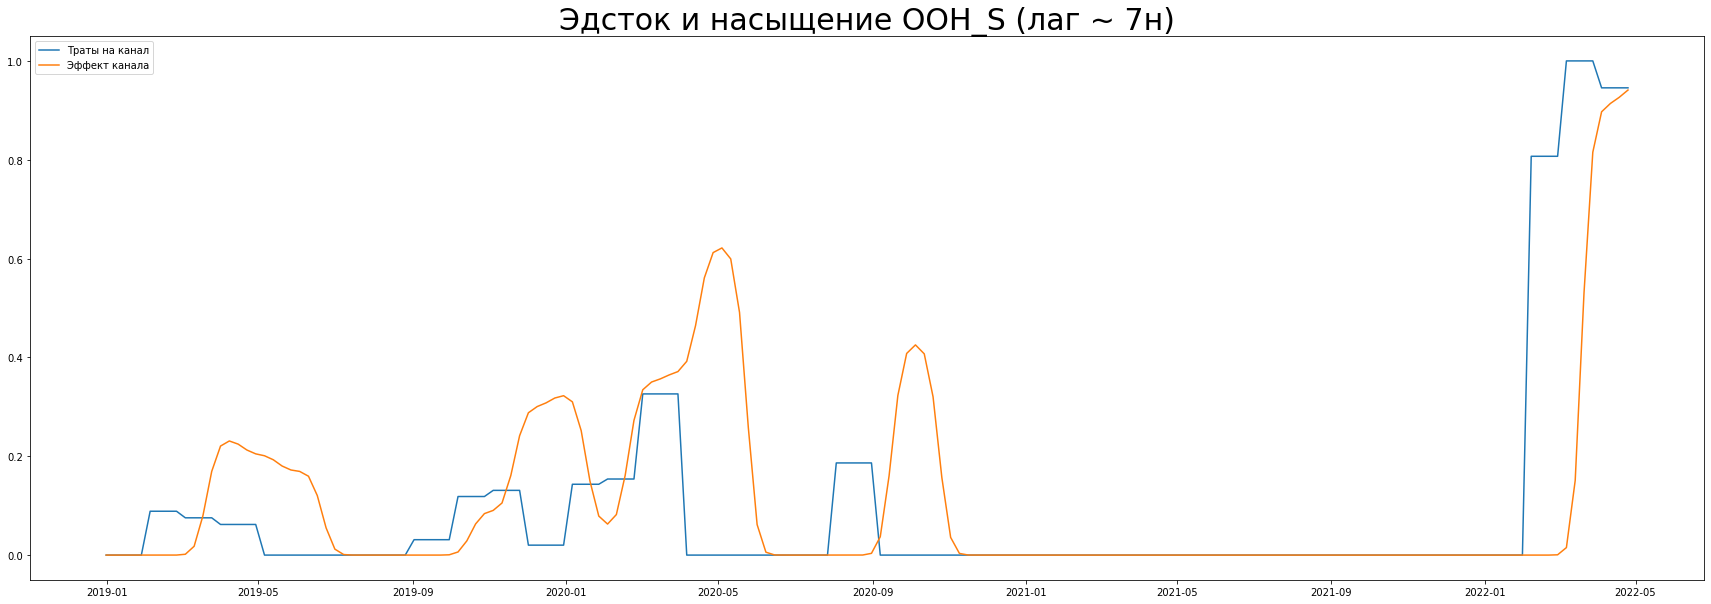

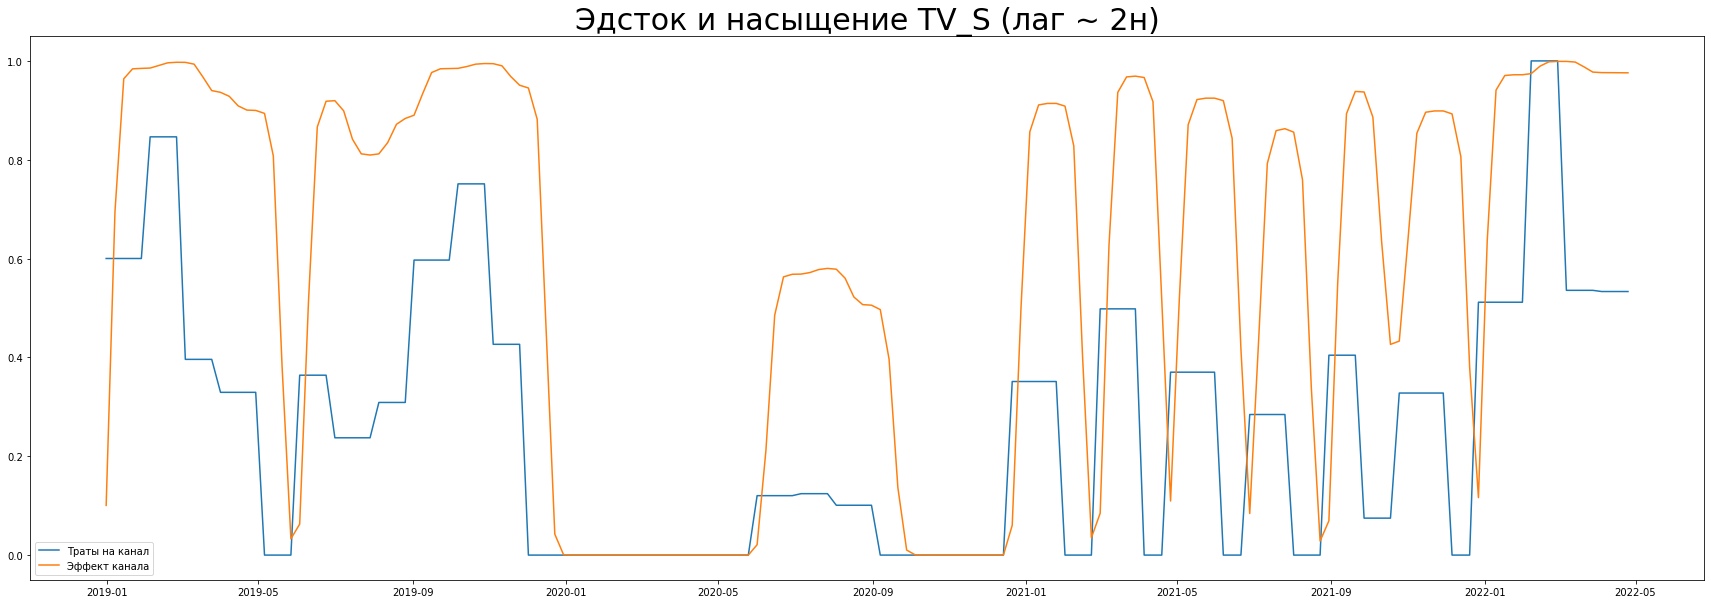

In [183]:
for channel in media_spend_columns:
    plot_channel(channel)

In [184]:
all_channel_spend = data[media_spend_columns].sum(axis=0)
spend_share = pd.DataFrame(all_channel_spend / all_channel_spend.sum() * 100, columns=['spend'])
spend_share

,spend
paid_S,43.225194
OLV_S,17.366287
Media_S,3.121659
OOH_S,2.680670
TV_S,33.606189


In [185]:
all_channel_effect = adj_contributions.sum(axis=0)
effect_share = pd.DataFrame(all_channel_effect / all_channel_effect.sum() * 100, columns=['effect'])
effect_share

,effect
Base,18.204107
season,21.520280
trend,14.893846
TRP_enemy_nac,9.745164
cbr,6.035156
mrtg_rate_all,9.403933
paid_S,15.301358
OLV_S,0.453963
Media_S,0.263323
OOH_S,1.029971


<AxesSubplot:>

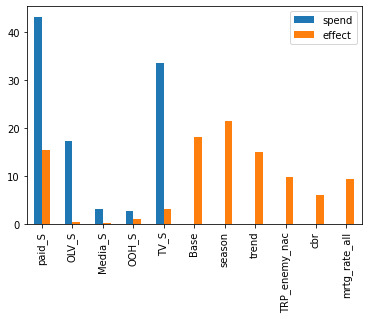

In [186]:
spend_effect = pd.concat([spend_share, effect_share], axis=1)
spend_effect.plot.bar()